# Assignment 6 Project for Course BAN6420 (Programming in Python and R)

- **Task 0** : Convolutional Neural Network (CNN) - Using Keras and classes in both Python and R, develop a CNN with six layers to classify the Fashion MNIST dataset.
- **Task 1** : Prediction - Make predictions for at least two images from the Fashion MNIST dataset.

### <u>1.0 Intro</u>
This project is all about building Convulutional Neural Networks for image classification at Microsoft AI. The task involves working with the Fashion MNIST dataset from Keras library. This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The classes are:

Label 	Description
- 0  -	T-shirt/top
- 1  -	Trouser
- 2  -	Pullover
- 3  -	Dress
- 4  -	Coat
- 5  -	Sandal
- 6  -	Shirt
- 7  -	Sneaker
- 8  -	Bag
- 9  -	Ankle boot

In [14]:
# Import the neccessary libraries

# from tensorflow.keras.datasets import fashion_mnist OR
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras import layers, optimizers, losses, metrics, utils
import matplotlib.pyplot as plt
import numpy as np

### <u>1.1 Input Data</u>
First, we need to read and unpack the fashion_mnist dataset

In [2]:
# Unpack all the atributes of the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### <u>1.2 Data Exploration</u>
Then, we need to get some insights into the features of the fashion_mnist datasets

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


### <u>Explanation (Context 1.0 - 1.2)</u>
From shape of the array above we can draw the following conclusions

- x_train - This shows the the train set contains 60,000 training images from the Fashion MNIST dataset with dimensions of 28 pixels by 28 pixels.

- x_test - This shows the the test set contains 10,000 test images from the Fashion MNIST dataset with dimensions of 28 pixels by 28 pixels.

### <u>2.0 Data Formatting and Data Transformation</u>
First, we need to change the datatype from int to float and transform the dataset using normalization method. The original pixel values in images typically ranges from 0 to 255.

In [5]:
# Datatype conversion from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels to form categorical data
y_train = utils.to_categorical(y_train, num_classes=10)
y_test = utils.to_categorical(y_test, num_classes=10)

# print(x_train)
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### <u>Explanation (Context 2.0)</u>
Due to the pixel of the data ranging from 0 to 255, The dataset needed to be normalized
- I converted the datatype from integer to float to make the model to have better precision during training.
- CNNs tends to perfom better when input values are small and within consistent range. Hence the need to transform the wide range of [0, 255] to [0, 1].


### <u>3.0 Model Creation</u>
At this stage we define the architecture of the neural network.

In [16]:
# Initialize Sequential model
model = Sequential()

### <u>3.1 Add Layers to the Model</u>
After creation of the model, the next phase is to add layers to the model which forms the neural network.

In [17]:
# Add six layers to the model

# 1st layer - Add 2D CNNN layer with image filters
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# 2nd layer - We add the maximum pool layer to reduce the size (height and width) to (2, 2) by selecting the maximum pixels to send to the output array.
model.add(layers.MaxPool2D(pool_size=(2, 2), padding='valid'))

# 3rd layer - We regularize the model by droping 25% of the neurons to reduce overfitting
model.add(layers.Dropout(rate=0.25))

# 4th layer - We reshape the 2D output array  to 1D to be fed into the fully connected Dense layer
model.add(layers.Flatten())

# 5th layer - This is to create a fully connected 128 neurons that is connected to the previous layer.
model.add(layers.Dense(units=128, activation="relu"))

# 6th layer - We drop 50% of neurons setting them to zero to ensure the model genralize.
model.add(layers.Dropout(rate=0.5))

# 7th layer - This is the final layer and the neurons are 10 to corrspond to each category of the dataset.
model.add(layers.Dense(units=10, activation='softmax'))

In [8]:
# Take a look at the diffrent layers and their output shape
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

### <u>Explanation (Context)</u>

At the first layer we added a 2D convolutional layer with 32 filters, each of size (3, 3). This layer extract features from the input image by sliding the filters across the image. Then, we make the model non-linear using Rectified Linear Unit (ReLU) and input size definition of 28 x 28.

At the final stage, we created a fully connected 10 neurons to correspond to a category in the fashion set as our output layer.

### <u>3.2 Model Compilation</u>
At this stage we will compile our model and get it ready for training with our 'train datasets'.

In [9]:
# Compile the model using the metrics ['accuracy','Precision','Recall']
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])

### <u>3.3 Model Training</u>
At this stage we will traing our model through 12 iterations or epochs using our train datasets

In [10]:
# Train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - Precision: 0.8433 - Recall: 0.6185 - accuracy: 0.7387 - loss: 0.7713 - val_Precision: 0.9012 - val_Recall: 0.8462 - val_accuracy: 0.8724 - val_loss: 0.3529
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - Precision: 0.8992 - Recall: 0.8361 - accuracy: 0.8678 - loss: 0.3721 - val_Precision: 0.9141 - val_Recall: 0.8653 - val_accuracy: 0.8902 - val_loss: 0.3082
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - Precision: 0.9108 - Recall: 0.8585 - accuracy: 0.8841 - loss: 0.3290 - val_Precision: 0.9112 - val_Recall: 0.8734 - val_accuracy: 0.8911 - val_loss: 0.2973
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - Precision: 0.9132 - Recall: 0.8668 - accuracy: 0.8894 - loss: 0.3046 - val_Precision: 0.9169 - val_Recall: 0.8736 - val_accuracy: 0.8926 - val_loss: 0.2902
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - Precision: 0.9183 - Recall: 0.8760 - accuracy: 0.8968 - loss: 0.2883 - val_Precision: 0.9161 - val_Re

In [11]:
# Display the attributes of the history object.
print(history.history.keys())

dict_keys(['Precision', 'Recall', 'accuracy', 'loss', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss'])


### <u>3.4 Data Visualization of the different metric used during model training</u>
- Accuracy

- Loss

- Precision

- Recall

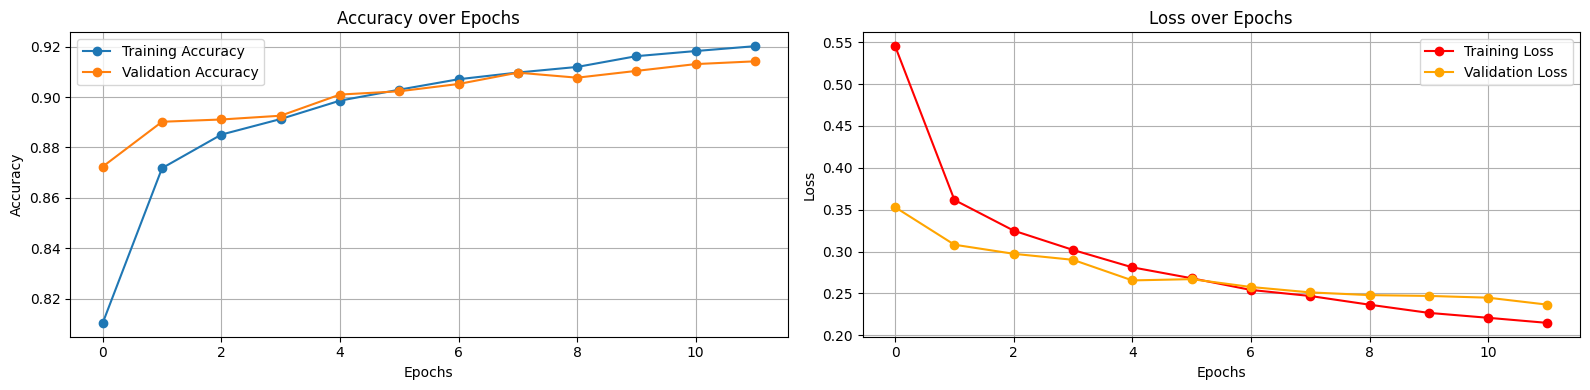

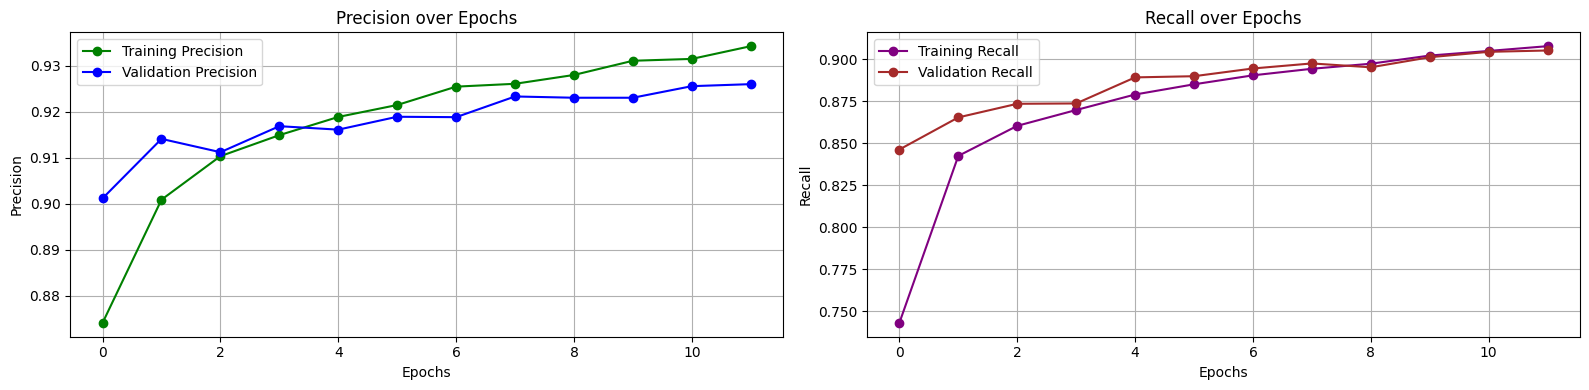

In [12]:

# Plot the graph of the Accuracy, Loss, Precision and Recall over their Validations

plt.figure(figsize=(16, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color='orange')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['Precision'], label='Training Precision', marker='o', color='green')
plt.plot(history.history['val_Precision'], label='Validation Precision', marker='o', color='blue')
plt.title('Precision over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# Plot Recall
plt.subplot(1, 2, 2)
plt.plot(history.history['Recall'], label='Training Recall', marker='o', color='purple')
plt.plot(history.history['val_Recall'], label='Validation Recall', marker='o', color='brown')
plt.title('Recall over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### <u>Explanation (Context 3.0 - 3.4)</u>

We have plotted the graph of iterations during training of the model. From the graph we can see that the model is not over-fitting or under-fitting. Rather is gragually approaching optimal fit. Both the training accuracy and validation accuracy continues improve which shows the model is actually learning and generalizing as well and will achieve an optimal fitting with addtional epochs and adjusting other parameters.

- <u>Over-fitting:</u> The model is not over-fitting as both the Training Accuracy and Validation accuracy continues to improve after each epoch.

- <u>Under-fitting:</u> The model is not under-fitting as both the Training Accuracy and Validation accuracy are hovering around 91-92% on 12 iterations.

- <u>Losses:</u> Looking at our loss over epochs, the Training loss and Validation loss hovers below 0.25. This means the model is neither over-fitting or under-fitting since both curves are low.

- <u>Precision:</u> The Training precision curve shows the model is performing well on the training dataset. Furthermore, the Validation Precision also indicates the model will perform well on unseen data.

- <u>Recall:</u> Both the Training Recall curve and Validation Recall curve are above 92% which means the sensitivity of the model on identifying true positives are high.

### <u>Summary of the assignment</u>
To summarize, the metrics graphs above has shows the model is perfoming quite well. The accuracy metrics are both perfoming at above 92% accuracy which is quite high after 12 epochs. But we still have about 8% gaps that is still unaccounted.

#### <u>Optimizing your model accuracy to optimal fir</u>
- We will keep on adjusting the batch size, dropout rate and learning rate while re-training the model untill we achieve an optimal fit with the model without over-fitting.

- We might also try adding more more layers (deepening) or neurons (widening) to help the model learn more patterns in the data.

### <u>4.0 Model Evaluation and Prediction</u>
Lastly, we have completed the trianing of our model classifier. We will now randomly pick two images to make predictions and compare it with the true labels. This will evaluate if the model is making right predictions on the test data.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Classes : [4 5]
True Labels Classes : [4 5]


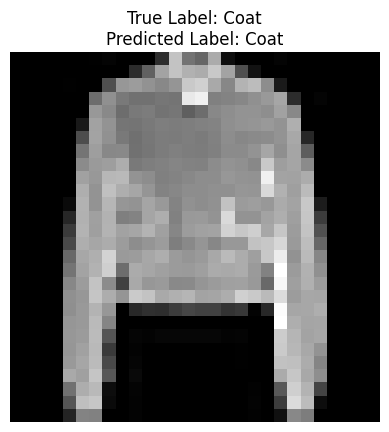

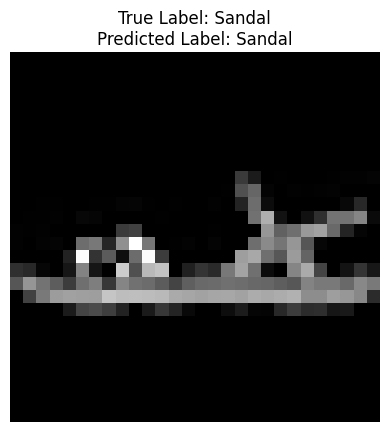

In [13]:
# Randomly select two test images for predictions
indices = np.random.choice(x_test.shape[0], 2, replace=False)
test_images = x_test[indices]
true_labels = y_test[indices]

# Reshape the test images to match the input shape of the CNN
test_images_reshaped = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Make predictions using our trained model
predictions = model.predict(test_images_reshaped)

# Extract the index of the maximum value of the test dataset
predicted_classes = np.argmax(predictions, axis=1)
true_labels_classes = np.argmax(true_labels, axis=1)

print(f"Predicted Classes : {predicted_classes}")
print(f"True Labels Classes : {true_labels_classes}")

# Label names for Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the results
for i, image in enumerate(test_images):
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {labels[true_labels_classes[i]]}\nPredicted Label: {labels[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()


### <u>Explanation (Context into Model Evaluation)</u>

The two images above shows random selection of images from the test data. We tried to make comparison between the true label and predicted label using our trained model. We will feed the model with a test data and evaluate if the model predicted the correct label when compared with the true label. With this step, nwe will be able make conclusion if our model is performing optimally and ready for deployement or whether it needs to still be fitted with more patterns.